In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
G.add_node(1)

In [6]:
G.add_nodes_from([2, 3])

In [8]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [10]:
G.add_node(H)

In [11]:
G.nodes

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x00000228CFCDDAC8>))

In [13]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [15]:
G.add_edges_from([(1, 2), (1, 3)])

In [18]:
G.add_edges_from(H.edges)

In [19]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [20]:
G.clear()

In [23]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [26]:
G.number_of_nodes(), G.number_of_edges()

(8, 3)

In [28]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))  # or list(G.neighbors(1))
print(G.degree[1])  # the number of edges incident to 1

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [29]:
print(G.edges([2, 'm']))
print(G.degree([2, 3]))

[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


In [32]:
G.remove_node(2)
G.remove_nodes_from("spam")
G.remove_edge(1, 3)
list(G.nodes), list(G.edges)

([1, 3, 'spam'], [])

In [33]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [34]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
list(H.nodes)

[0, 1, 2, 3]

In [35]:
print(G[1])  # same as G.adj[1]
print(G[1][2])
print(G.edges[1, 2])

{2: {}}
{}
{}


In [41]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

In [44]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [45]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


In [46]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [47]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [49]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [50]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [51]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [52]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [53]:
DG.degree(1, weight='weight')

1.25

In [54]:
list(DG.successors(1))

[2]

In [55]:
list(DG.neighbors(1))

[2]

In [56]:
H = nx.Graph(G)  # convert G to undirected graph

In [57]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [58]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

In [59]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [60]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [61]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [62]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

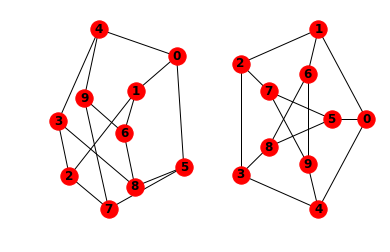

In [69]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold');

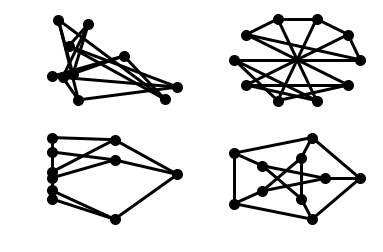

In [70]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)

nx.draw_random(G, **options)
plt.subplot(222)

nx.draw_circular(G, **options)
plt.subplot(223)

nx.draw_spectral(G, **options)
plt.subplot(224)

nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

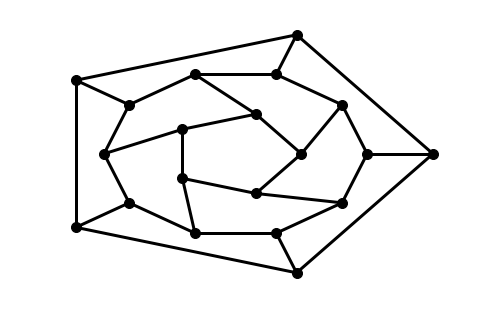

In [71]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)